# QUESTION - 1

In [1]:
import re
from collections import Counter


In [2]:
paragraphs = []
with open("Downloads//data.txt",encoding="utf-8") as file:
    for line in file.readlines():
        paragraphs.append(line)

In [3]:
print("Number of paragraphs :",len(paragraphs))


Number of paragraphs : 119749


In [4]:
words = []
pattern = r'\W+'
for text in paragraphs:
    
    temp = re.split(pattern, text)
    #print("length is :",len(temp))
    words.append(temp)
    
word_list = [item for sublist in words for item in sublist]
corpus_length = len(word_list)
print("Number of words in the given corpus :",corpus_length)

word_freq = dict(Counter(word_list))

for keys,values in word_freq.items():
    word_freq[keys] = values/corpus_length
    
print("Frequency of words in the given Corpus:")
word_freq


Number of words in the given corpus : 16573899
Frequency of words in the given Corpus:


{'April': 0.0005050109210874279,
 'is': 0.01962435031129368,
 'the': 0.05754922242497073,
 'fourth': 0.0001194649490744453,
 'month': 7.777288856412121e-05,
 'of': 0.03159835835852505,
 'year': 0.000749793395024309,
 'and': 0.024995747832178776,
 'comes': 0.00022288056660656614,
 'between': 0.0008560447967011262,
 'March': 0.0005173194309920677,
 'May': 0.0005522538782214131,
 'It': 0.005677420865180849,
 'has': 0.0031968337685658638,
 '30': 0.00033039902077356694,
 'days': 0.0002190794091360156,
 'begins': 5.2733517924780406e-05,
 'on': 0.006400545822078438,
 'same': 0.000646981135820847,
 'day': 0.0003981561610819518,
 'week': 8.410815101503877e-05,
 'as': 0.006119863527586357,
 'July': 0.0005184658118165195,
 'in': 0.026130845855884606,
 'all': 0.001192658408259879,
 'years': 0.0010862863349173299,
 'also': 0.003202445001022391,
 'January': 0.0005578651106779401,
 'leap': 1.9488474015679715e-05,
 's': 0.004719408510936382,
 'flowers': 5.394023458209803e-05,
 'are': 0.006224063510945

In [5]:
word_rank = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True))
word_rank

{'the': 0.05754922242497073,
 'of': 0.03159835835852505,
 'in': 0.026130845855884606,
 'and': 0.024995747832178776,
 'a': 0.022204913882967428,
 'is': 0.01962435031129368,
 'to': 0.017779280542255024,
 'was': 0.013769542097487139,
 'The': 0.012148257932548038,
 '': 0.00745280274725941,
 'for': 0.007270105845341521,
 'on': 0.006400545822078438,
 'are': 0.006224063510945735,
 'as': 0.006119863527586357,
 'that': 0.005999433205186058,
 'by': 0.005882804040256309,
 'It': 0.005677420865180849,
 'with': 0.005198233680560018,
 'from': 0.0049953846104649246,
 'He': 0.004774012439680005,
 's': 0.004719408510936382,
 'an': 0.004045034906994425,
 'or': 0.003896729429810089,
 'it': 0.0038824901732537405,
 'In': 0.003793736163108029,
 'at': 0.003742873056002091,
 'his': 0.0036108582536915424,
 'he': 0.0033332530866756215,
 'were': 0.003218977019227642,
 'also': 0.003202445001022391,
 'has': 0.0031968337685658638,
 'be': 0.003183439213669638,
 'not': 0.0027829902909387826,
 'which': 0.00272838636219

In [6]:
data = {
"Word" : word_rank.keys(),
"Frequencies" : word_rank.values(),
"Ranks" : [i for i in range(1,len(word_rank)+1)]

}

In [7]:
import pandas as pd

Data = pd.DataFrame(data)
print(Data.head())

  Word  Frequencies  Ranks
0  the     0.057549      1
1   of     0.031598      2
2   in     0.026131      3
3  and     0.024996      4
4    a     0.022205      5


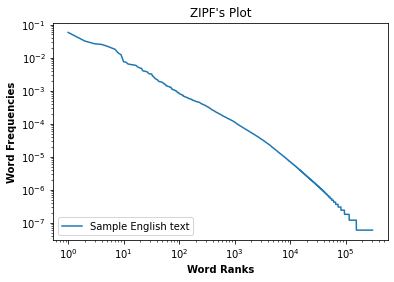

In [8]:
from matplotlib import pylab
pylab.loglog(Data['Ranks'], Data['Frequencies'], label='Sample English text') 
pylab.xlabel('Word Ranks',fontweight='bold')
pylab.ylabel('Word Frequencies',fontweight='bold')
pylab.legend(loc='lower left')
pylab.title("ZIPF's Plot")
pylab.show()


# QUESTION 2 :-  SIMILARITY MEASURE

In [9]:
D1 = "this is the text about web science"
D2 = "web science is covering the analysis of text corpa"
D3 = "scientific methods are used to analyze web pages"

In [10]:
words_d1 = D1.split(" ")
words_d2 = D2.split(" ")
words_d3 = D3.split(" ")

In [11]:
words_d3

['scientific', 'methods', 'are', 'used', 'to', 'analyze', 'web', 'pages']

In [14]:
def jaccard_Similarity(doc1 : str, doc2 : str) -> float : 
    """
    This function will calculate the jaccard similarity between the two docs
    :param doc1 : Document/text which contains a set of words 
    :param doc2 : Document/text which contains a set of words 
   
    :return : a float value which represents the jaccord similarity
    
    """
    
    #Converting into the lower case and removing the duplicate words
    words_doc1 = set(doc1.lower().split()) 
    words_doc2 = set(doc2.lower().split())
    
    # Finding the Common set of words from both doc1 & doc2
    numerator = len(words_doc1.intersection(words_doc2))  # intersection operation
    
    # Total number of words in both doc1 & doc2
    denomenator = len(words_doc1.union(words_doc2))  # union operation
        
    # Calculate Jaccard similarity score     
    return numerator / denomenator

In [16]:
print("The jaccord similarity between the D1 and D2 ",jaccard_Similarity(D1,D2))
print("The jaccord similarity between the D2 and D3 ",jaccard_Similarity(D2,D3))
print("The jaccord similarity between the D3 and D1 ",jaccard_Similarity(D3,D1))


The jaccord similarity between the D1 and D2  0.45454545454545453
The jaccord similarity between the D2 and D3  0.0625
The jaccord similarity between the D3 and D1  0.07142857142857142


# QUESTION 4 COSINE SIMILARITY

In [58]:
from math import sqrt

In [113]:
import math
d1 = "i love you"
d2 = "you are beautiful"
d3 = "i love beautiful koblenz"



In [35]:
d_all = d1.split() + d2.split() + d3.split()

In [40]:
d_sets = set(d_all)
list(d_sets)

['i', 'are', 'koblenz', 'love', 'you', 'beautiful']

In [48]:
d1_index = [1 if i in d1.split() else 0 for i in d_sets]

d2_index = [1 if i in d2.split() else 0 for i in d_sets]

d3_index = [1 if i in d3.split() else 0 for i in d_sets]

In [57]:
print(d1_index, d2_index, d3_index, sep="\n")

[1, 0, 0, 1, 1, 0]
[0, 1, 0, 0, 1, 1]
[1, 0, 1, 1, 0, 1]


In [63]:
def cos_sim(x, y):
    sum_x = 0
    sum_y = 0
    sum = 0
    for i,j in zip(x, y):
        sum_x += i * i
        sum_y += j * j
        sum += i * j
    cosine = sum / ((sqrt(sum_x)) * (sqrt(sum_y)))
    
    print(cosine)

## D1 and D2

In [67]:
print("Cosine Similarty D1 and D2:")
cos_sim(d1_index, d2_index)

Cosine Similarty D1 and D2:
0.33333333333333337


## D1 and D3

In [68]:
print("Cosine Similarty D1 and D3:")
cos_sim(d1_index, d3_index)

Cosine Similarty D1 and D3:
0.5773502691896258


## D2 and D3

In [70]:
print("Cosine Similarty D2 and D3:")
cos_sim(d3_index, d2_index)

Cosine Similarty D2 and D3:
0.2886751345948129
